# Finding And Predicting who will Default OR Not

# Necessary Imports

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


# Read Data

In [49]:
indataset = pd.read_csv('input.csv',header=None)
loan_dataset = pd.read_csv('loan_data.csv')
loan_dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [50]:
loan_dataset.shape

(9578, 14)

In [51]:
indataset.shape

(9578, 18)

In [52]:
indataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0


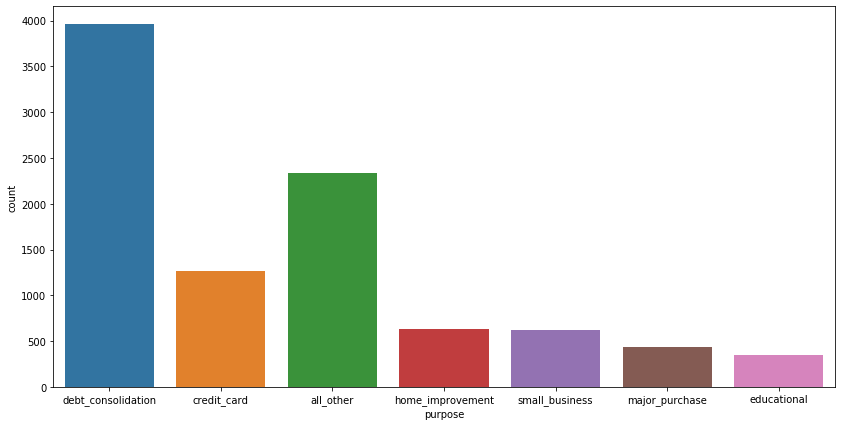

In [53]:
plt.figure(figsize=(14,7))
sns.countplot(loan_dataset['purpose'])


In [54]:
#Highest no of loans are in debt consolidation category 

In [55]:
loan_dataset['delinq.2yrs'].value_counts()

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
7        1
13       1
11       1
8        1
Name: delinq.2yrs, dtype: int64

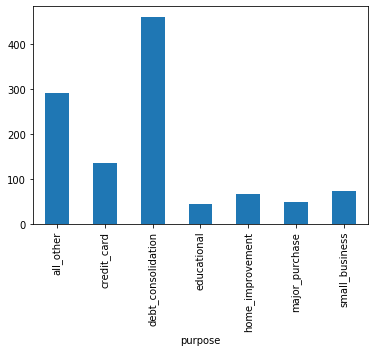

In [56]:
loan_dataset[loan_dataset['delinq.2yrs']!=0].groupby('purpose').fico.count().plot(kind='bar')

In [57]:
#Three Categories have highest deliquencies - debt consolidation creadit_cards and ,all_other

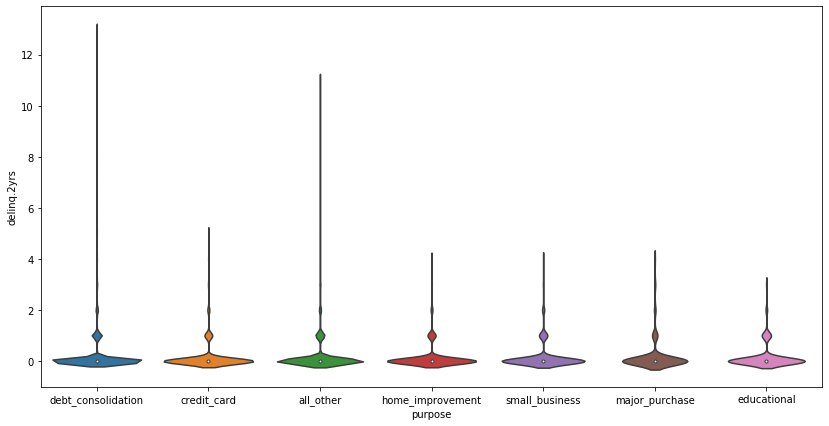

In [58]:
plt.figure(figsize=(14,7))

sns.violinplot(x='purpose',y='delinq.2yrs',data=loan_dataset)

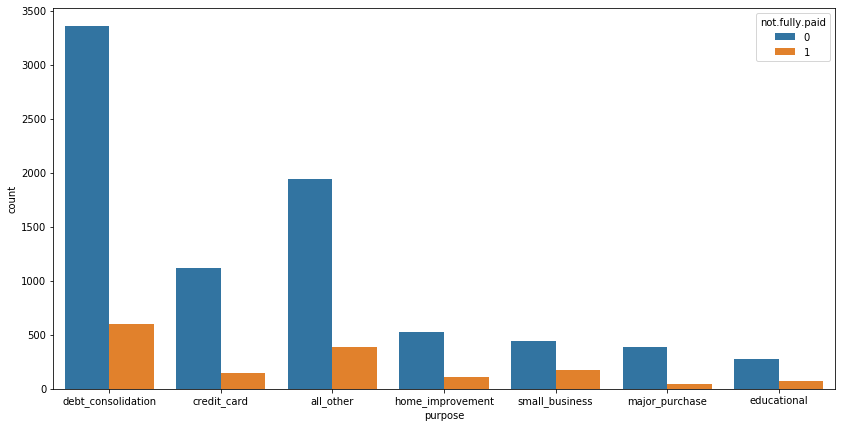

In [59]:
plt.figure(figsize=(14,7))
sns.countplot(data=loan_dataset,x='purpose',hue='not.fully.paid')

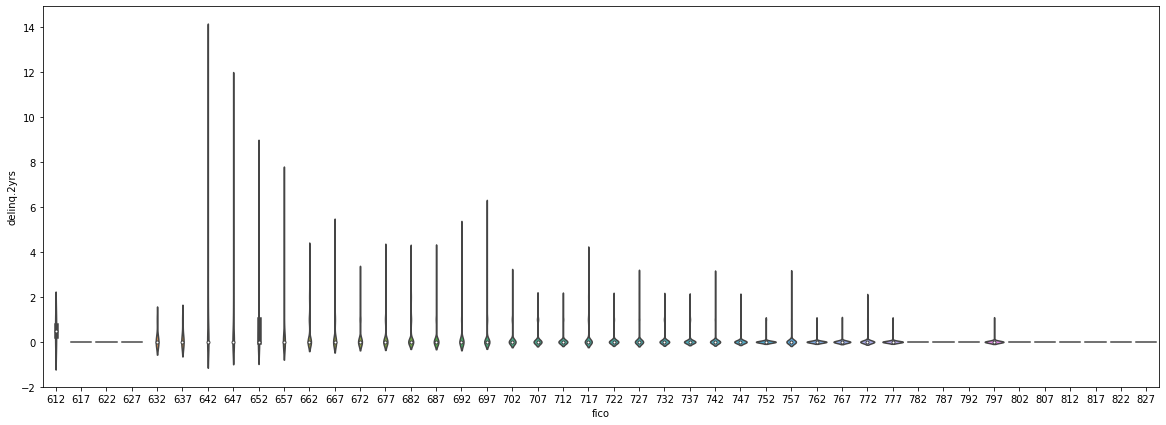

In [60]:
plt.figure(figsize=(20,7))
#sns.violinplot(y='delinq.2yrs',x='fico',hue='not.fully.paid',data=loan_dataset)
sns.violinplot(y='delinq.2yrs',x='fico',data=loan_dataset)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


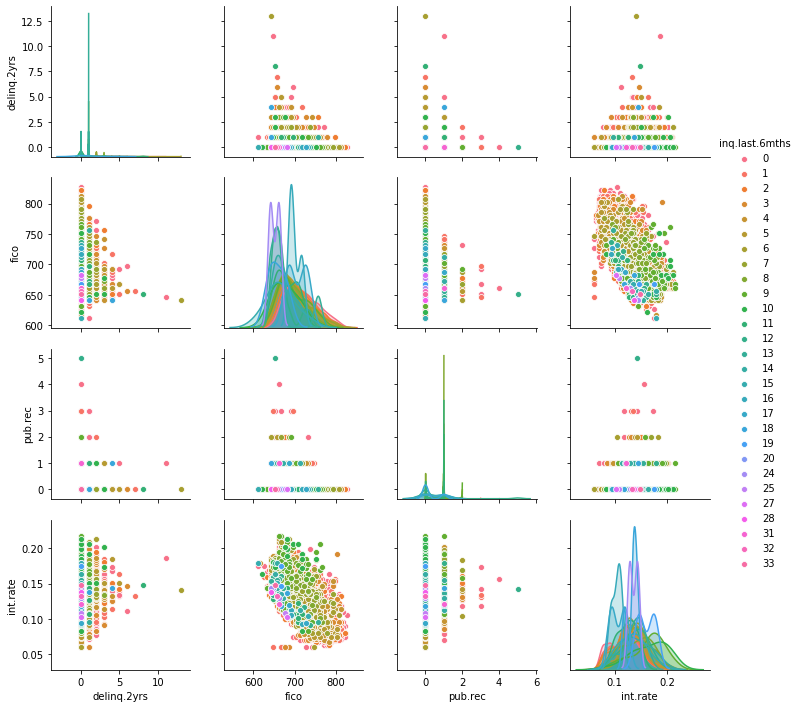

In [61]:
sns.pairplot(vars=['delinq.2yrs','fico','pub.rec','int.rate'],hue='inq.last.6mths',data=loan_dataset)

In [62]:
loan_dataset.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [63]:
# fico and deliquency have sig negative Correlations
# More inquiries many times are related to negative public records and higher int rate
# fico and int rate are inversely proportional 

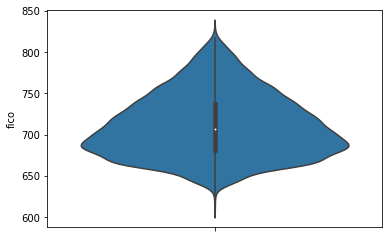

In [64]:
sns.violinplot(y=loan_dataset['fico'],hue=loan_dataset['not.fully.paid'])

In [65]:
# High fico score correspond to better recovery of loans,Loans are fully paid for high fico score
#650-725 fico score is the highest concentration of borrowers and possibly defaulters also


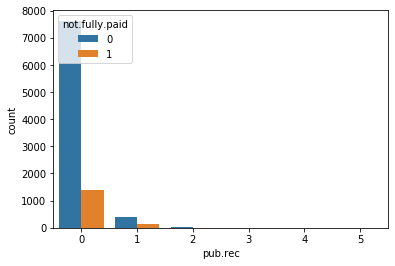

In [66]:
sns.countplot(x='pub.rec',hue='not.fully.paid',data=loan_dataset)

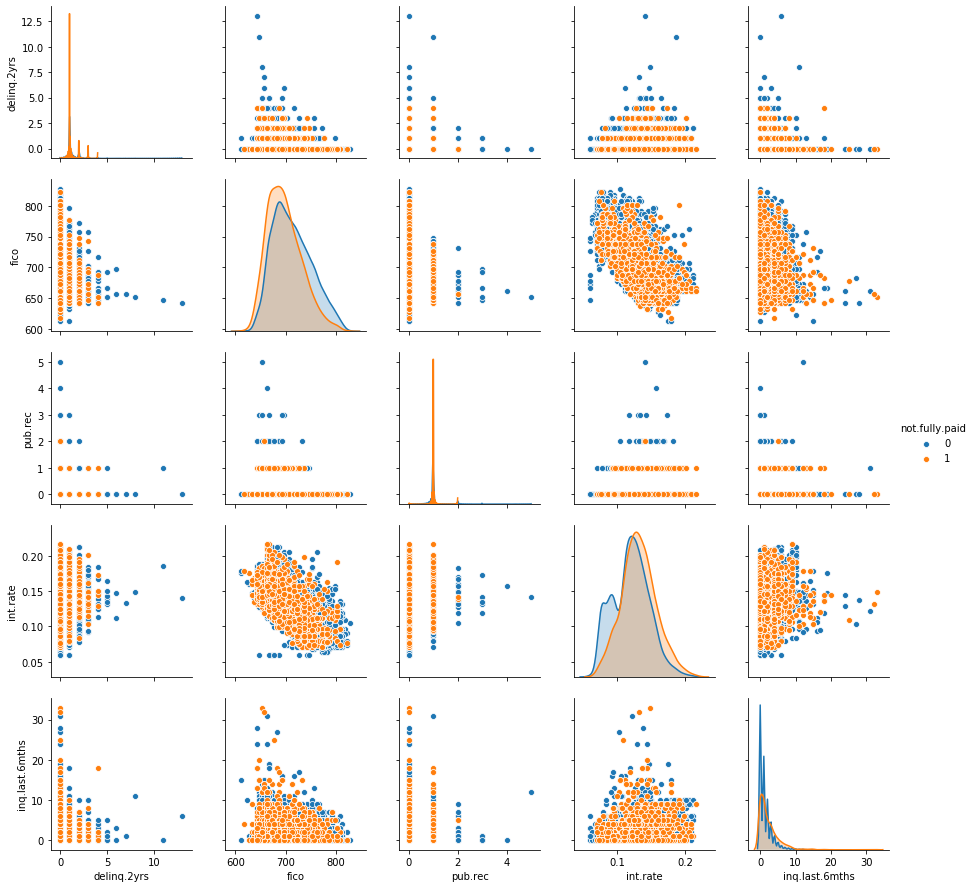

In [67]:
sns.pairplot(vars=['delinq.2yrs','fico','pub.rec','int.rate','inq.last.6mths'],hue='not.fully.paid',data=loan_dataset)

In [68]:
#Lets change the purpose column to numerical 

In [69]:
from sklearn import  preprocessing
labelEncoder=preprocessing.LabelEncoder()
loan_dataset.purpose=labelEncoder.fit_transform(loan_dataset.purpose)


In [70]:
labelEncoder.classes_

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

In [71]:
import numpy as np
np.unique(loan_dataset.purpose)

array([0, 1, 2, 3, 4, 5, 6])

In [72]:
loan_dataset.dtypes

credit.policy          int64
purpose                int64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

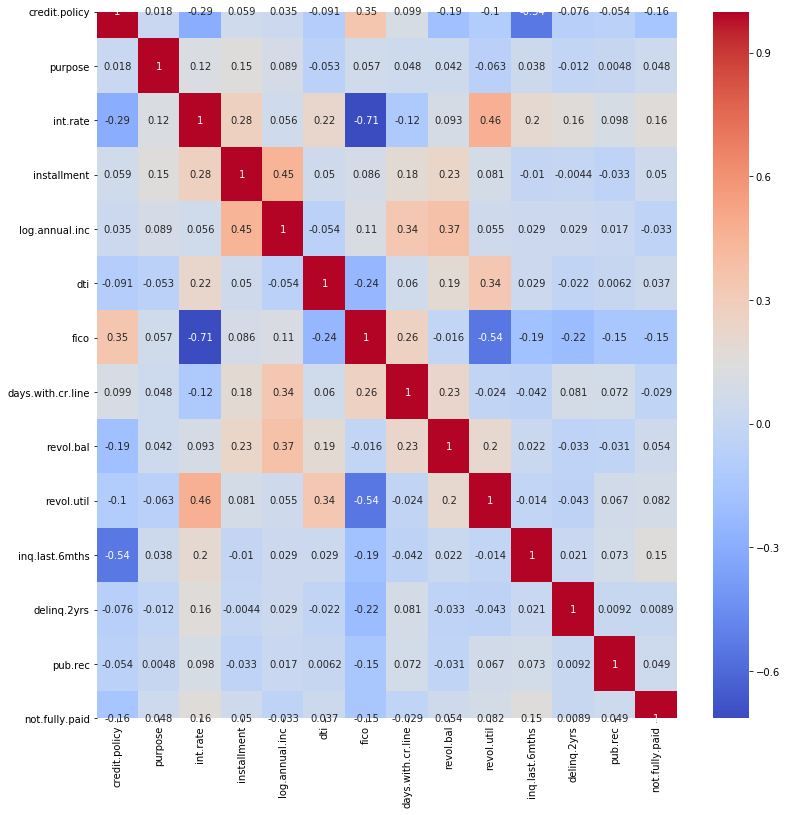

In [73]:
plt.figure(figsize=(13,13))
corrMap = loan_dataset.corr()
sns.heatmap(corrMap,annot=True,cmap='coolwarm')

# Lets load the inputs and labels

In [74]:
inputdata = pd.read_csv('input.csv',header=None)


In [75]:
indataset.shape

(9578, 18)

In [76]:
labels = pd.read_csv('output.csv',header=None)
labels.shape

(9578, 2)

In [77]:
inputdata.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5       int64
6     float64
7       int64
8     float64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
dtype: object

# split Between training and testing 

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(inputdata,labels,test_size=0.25,random_state=10)

In [79]:
X_train.shape

(7183, 18)

In [80]:
X_test.shape

(2395, 18)

In [81]:
y_train.shape

(7183, 2)

In [82]:
y_test.shape

(2395, 2)

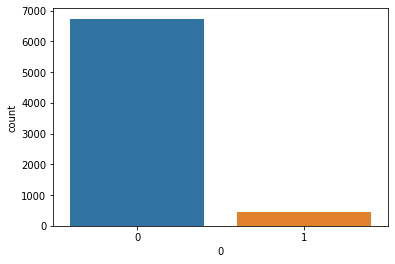

In [83]:
sns.countplot(y_train.iloc[:,0])

In [84]:
# Highly imbalanced dataset

# Create Model

In [85]:
#we will first try with a DNN classifier

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
np.random.seed(42)
dnnmodel = Sequential()
dnnmodel.add(Dense(12, input_dim=18, activation='relu'))
dnnmodel.add(Dropout(0.2))
dnnmodel.add(Dense(24,activation='relu'))
dnnmodel.add(Dropout(0.2))
dnnmodel.add(Dense(36,activation='relu'))
dnnmodel.add(Dropout(0.2))
dnnmodel.add(Dense(2,activation='sigmoid'))
print(dnnmodel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                228       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                900       
_________________________________________________________________
dropout_3 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [89]:
dnnmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
dnnmodel.fit(X_train,y_train,epochs=50,batch_size=36)

#check Final Accuracy

scores = dnnmodel.evaluate(X_test,y_test)
print("\n%s: %0.2f%%"%(dnnmodel.metrics_names[1],scores[1]*100))

2395/2395 [==============================] - 0s 78us/step

accuracy: 92.94%


In [98]:
predictions = dnnmodel.predict(X_test)

def converToBinary(dec):
    if dec < 0.5:
        return 0
    else:
        return 1
predictions_df = pd.DataFrame(predictions)

predictions_df.iloc[:,0] = predictions_df.iloc[:,0].apply(converToBinary)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.iloc[:,0],predictions_df.iloc[:,0]))

[[2226    0]
 [ 169    0]]


In [99]:
# we were able to predict 2226 non deafaulters
#Not Able to predict even a single defaulters !!!

In [100]:
predictions[:20,0]

array([0.06367076, 0.06367076, 0.06367076, 0.06367076, 0.06367076,
       0.06367076, 0.06367076, 0.06367076, 0.06367076, 0.06367076,
       0.06367076, 0.06367076, 0.06367076, 0.06367076, 0.06367076,
       0.06367076, 0.06367076, 0.06367076, 0.06367076, 0.06367076],
      dtype=float32)